In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('train_ml1.csv')
vars = ['x1','x2','x3','x4','x5']
df

,x1,x2,x3,x4,x5,train,y
0,-99.551155,-133.218630,-1198.56910,0,0.000000,1,3380.71610
1,-180.243940,-147.405440,-1450.67760,0,0.000000,1,4018.73290
2,122.136280,-107.456430,283.78690,0,0.000000,1,-613.12384
3,-28.301346,36.367268,580.37982,1,0.000000,1,1097.56800
4,125.517690,-49.982388,730.12872,1,-77.617165,1,1306.41890
...,...,...,...,...,...,...,...
272,-82.925644,-3.677815,-943.92950,1,0.000000,1,-2063.70630
273,-173.904310,61.768822,527.19019,0,0.000000,1,-1946.74760
274,-73.006836,3.468329,506.56113,1,0.000000,1,877.31989
275,-9999.000000,-137.198040,1579.59770,0,0.000000,1,-4877.50340


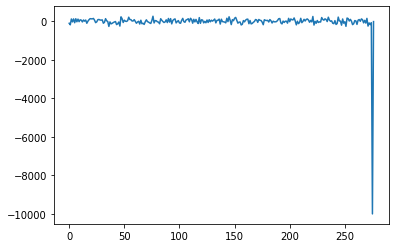

In [19]:
plt.plot(df.x1)

In [20]:
df = df[df.x1 > -999 ]
df.dropna

x=df.index
y=df.iloc[:,6]

(array([ 3.,  6., 21., 46., 64., 68., 39., 20.,  6.,  3.]),
 array([-8847.7432 , -7116.60238, -5385.46156, -3654.32074, -1923.17992,
         -192.0391 ,  1539.10172,  3270.24254,  5001.38336,  6732.52418,
         8463.665  ]),
 <BarContainer object of 10 artists>)

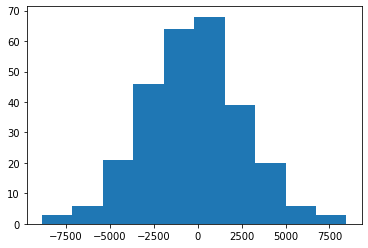

In [21]:
plt.hist(y) # TODO add labes

# looks normal

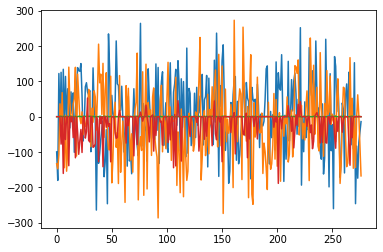

In [22]:
# look at variables:
plt.plot(df.x1)
plt.plot(df.x2)
plt.plot(df.x4)
plt.plot(df.x5)


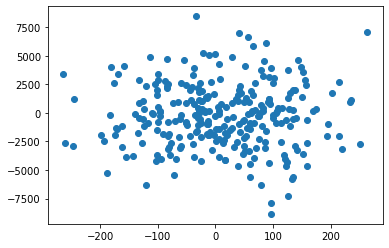

In [23]:
plt.scatter(df.x1, df.y)
plt.show()

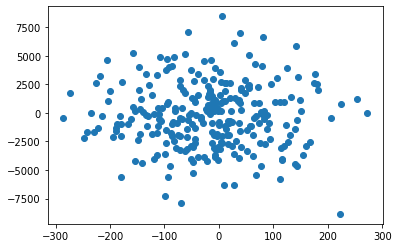

In [24]:
plt.scatter(df.x2, df.y)
plt.show()

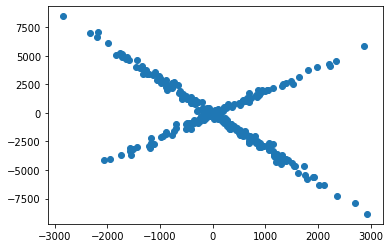

In [25]:
plt.scatter(df.x3, df.y)
plt.show()

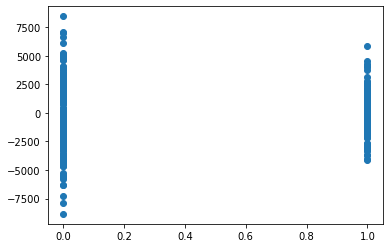

In [26]:
plt.scatter(df.x4, df.y)
plt.show()

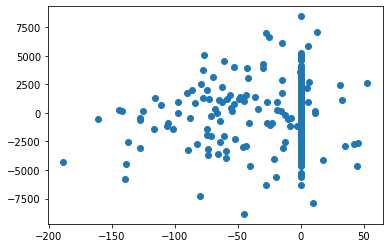

In [27]:
plt.scatter(df.x5, df.y)
plt.show()

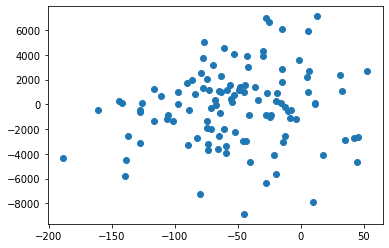

In [28]:
#modify data:
#remove 0s in x5
df = df[df.x5 != 0 ]
plt.scatter(df.x5, df.y)
plt.show()

In [29]:
df.describe()


,x1,x2,x3,x4,x5,train,y
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,76.801673,48.131735,174.956477,0.366071,-51.430454,0.991071,-202.114657
std,76.878656,83.812817,1123.340737,0.483894,48.263417,0.094491,3090.781646
min,-131.849260,-128.221790,-2320.434600,0.000000,-188.637150,0.000000,-8847.743200
25%,37.656185,-9.930121,-428.662802,0.000000,-77.491182,1.000000,-2556.379250
50%,80.629513,44.330951,56.141934,0.000000,-53.123013,1.000000,73.380280
75%,127.350293,112.488800,905.871020,1.000000,-18.370323,1.000000,1432.454325
max,263.999080,272.811490,2940.537800,1.000000,52.763409,1.000000,7105.848100


In [30]:
""" df.x6 = df.x4 * df.x3

plt.scatter(df.x6, df.y)
plt.show() """

' df.x6 = df.x4 * df.x3\n\nplt.scatter(df.x6, df.y)\nplt.show() '

In [31]:
""" df.x7 = df.x3[df.x4 == 0]
df.y2 = df.y[df.x4 ==0]
plt.scatter(df.x7, df.y2)
plt.show() """

' df.x7 = df.x3[df.x4 == 0]\ndf.y2 = df.y[df.x4 ==0]\nplt.scatter(df.x7, df.y2)\nplt.show() '

In [32]:
#SPLIT

x_train, x_test, y_train, y_test = train_test_split(df.loc[:, vars], df.loc[:, 'y'], test_size=0.25, random_state=13)
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)




(84, 5) (84,)
(28, 5) (28,)


In [33]:
linear_model = LinearRegression(normalize=True)
p2_model = LinearRegression(normalize=True) # 2 degrees 
p3_model = LinearRegression(normalize=True) # 3 degrees

p2_features = PolynomialFeatures(degree=2)
p3_features = PolynomialFeatures(degree=3)

p2_train = p2_features.fit_transform(x_train)
p2_test = p2_features.fit_transform(x_test)

p3_train = p3_features.fit_transform(x_train)
p3_test = p3_features.fit_transform(x_test)

lin_1 = linear_model.fit(x_train, y_train)
p2_1 = p2_model.fit(p2_train, y_train)
p3_1 = p3_model.fit(p3_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce t

In [34]:
""" score_lin = np.mean(cross_val_score(lin_1, x, y, cv=10))
score_p2 = np.mean(cross_val_score(p2_1, x_train, y_train, cv=10))
score_p3 = np.mean(cross_val_score(p3_1, x_train, y_train, cv=10)) """



# predict values for test sets
lin1_predict = lin_1.predict(x_test)
p2_predict = p2_1.predict(p2_test)
p3_predict = p3_1.predict(p3_test)


lin_score=np.mean(cross_val_score(linear_model, df[vars], df.y, cv=5))
p2_score = np.mean(cross_val_score(p2_model, df[vars],df.y, cv=5))
p3_score = np.mean(cross_val_score(p3_model, df[vars],df.y, cv=5))
## idk why they are all the same idk idk idk

""" # ok, check first ten observations of predictions, y_test, and errors to make sure nothing is wrong
print (lin1_predict[0:10])
print (y_test[0:10]) """


print('MSE for test set')
print('MSE: lin ', metrics.mean_squared_error(lin1_predict, y_test))
print('MSE: p2 ', metrics.mean_squared_error(p2_predict, y_test))
print('MSE: p3 ', metrics.mean_squared_error(p3_predict, y_test))
# 2 degree model has lowest mean squared error

print('MSE for train set')
print('MSE: lin ', metrics.mean_squared_error(y_train, lin_1.predict(x_train)))
print('MSE: p2 ', metrics.mean_squared_error(y_train, p2_1.predict(p2_train)))
print('MSE: p3 ', metrics.mean_squared_error(y_train, p3_1.predict(p3_train)))



# also do R^2
print ("linear train / test r^2: ", r2_score(y_train, lin_1.predict(x_train)), " / ", r2_score(y_test, lin1_predict))
print ("poly degree 2 train / test r^2: ", r2_score(y_train, p2_1.predict(p2_train)), " / ", r2_score(y_test, p2_predict))
print ("poly degree 3 train / test r^2: ", r2_score(y_train, p3_1.predict(p3_train)), " / ", r2_score(y_test, p3_predict))


MSE for test set


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce t

NameError: name 'metrics' is not defined

In [ ]:
for i in range(0, len(vars)):
    print (vars[i], ", ", (lin_1.coef_)[i])

x1 ,  -0.9131209625718919
x2 ,  0.4513805021862289
x3 ,  -1.4608134133813213
x4 ,  536.9125362322367
x5 ,  12.008113927619009


In [ ]:
#final equation
for i in range(0, len(p2_features.get_feature_names())):
        
        if abs(p2_1.coef_)[i] > 1e-1: 
            print(p2_features.get_feature_names(x_train.columns)[i], ", ", (p2_1.coef_)[i])

x1 ,  1.9984754229867032
x3 ,  -3.01019590632108
x4 ,  -12.96918403282309
x5 ,  5.153666390099177
x2 x4 ,  0.1454544142080935
x3 x4 ,  5.006156338934698
x4^2 ,  -12.969184032824774
x4 x5 ,  -0.21531932483352248


In [ ]:
for i in range(0, len(p3_features.get_feature_names())):
    print (p3_features.get_feature_names(x_train.columns)[i], ", ", (p3_1.coef_)[i])

1 ,  1.9115515877747664e+16
x1 ,  -0.060897050034982206
x2 ,  -1.6074780219601708
x3 ,  -3.065983562042343
x4 ,  -20.816575392985712
x5 ,  6.215541041606113
x1^2 ,  0.0105568993331217
x1 x2 ,  0.023242173321707367
x1 x3 ,  6.249383922954759e-05
x1 x4 ,  0.0969524980988712
x1 x5 ,  0.0023831194253279646
x2^2 ,  0.007273423226556103
x2 x3 ,  0.0002544572548995776
x2 x4 ,  1.0432752233769298
x2 x5 ,  -0.0015529791265268685
x3^2 ,  3.861709153790824e-05
x3 x4 ,  2.5047955057578504
x3 x5 ,  -0.0011775642451088881
x4^2 ,  -20.816575392985083
x4 x5 ,  -0.5097963613265868
x5^2 ,  0.021091605112272597
x1^3 ,  -2.44213422209257e-05
x1^2 x2 ,  -5.458386258036837e-05
x1^2 x3 ,  -1.0675922675080071e-06
x1^2 x4 ,  0.0012214462746257153
x1^2 x5 ,  -2.248758918825146e-07
x1 x2^2 ,  -2.753684001562787e-06
x1 x2 x3 ,  -5.734685150445508e-07
x1 x2 x4 ,  -0.010448432458370502
x1 x2 x5 ,  0.00016278772224712207
x1 x3^2 ,  -2.8141998327909665e-07
x1 x3 x4 ,  0.00035495529463110305
x1 x3 x5 ,  1.729989758882

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
